In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTENC
from collections import Counter
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [14]:
pd.set_option('display.max_columns', 50)

In [15]:
data = pd.read_csv('bank-full.csv')

In [16]:
display(data.head())
print("data shape : {0}".format(data.shape))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


data shape : (45211, 17)


In [17]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [19]:
replaceStruct = { "marital"   : {"single": 1, "married": 2, "divorced": 3},
                  "education" : {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": -1},
                  "default"   : {"no": 0, "yes": 1 },
                  "housing"   : {"no": 0, "yes": 1 },
                  "loan"      : {"no": 0, "yes": 1 },
                  "month"     : {"jan": 1, "feb": 2, "mar": 3, "apr":  4, "may":  5, "jun":  6,
                                 "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                  "poutcome"  : {"success": 1, "failure": 2, "other": 3, "unknown": -1},
                  "Target"    : {"no": 0, "yes": 1 } }

In [20]:
oneHotCols=["job", "contact"]

In [21]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.drop(columns=["job_unknown", "contact_unknown"], inplace=True)
data.head(10)

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone
0,58,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,1,2,0,29,1,0,5,5,151,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,2,0,2,1,1,5,5,76,1,-1,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,2,-1,0,1506,1,0,5,5,92,1,-1,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,1,-1,0,1,0,0,5,5,198,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,35,2,3,0,231,1,0,5,5,139,1,-1,0,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,28,1,3,0,447,1,1,5,5,217,1,-1,0,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,42,3,3,1,2,1,0,5,5,380,1,-1,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,58,2,1,0,121,1,0,5,5,50,1,-1,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,43,1,2,0,593,1,0,5,5,55,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
# convert day and month into single variable
data['date'] = data.day + data.month*100
data.drop(columns=["day", "month"], inplace=True)

In [23]:
# Move the dependent feature at the end, holds no value when training models. it just makes it easier to do the exploratory analyais
cols_to_move = ['Target']
new_cols = np.hstack((data.columns.difference(cols_to_move), cols_to_move))
data = data.reindex(columns=new_cols)
data.head()

,age,balance,campaign,contact_cellular,contact_telephone,date,default,duration,education,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan,marital,pdays,poutcome,previous,Target
0,58,2143,1,0,0,505,0,261,3,1,0,0,0,0,1,0,0,0,0,0,0,0,2,-1,-1,0,0
1,44,29,1,0,0,505,0,151,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,-1,-1,0,0
2,33,2,1,0,0,505,0,76,2,1,0,0,1,0,0,0,0,0,0,0,0,1,2,-1,-1,0,0
3,47,1506,1,0,0,505,0,92,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,-1,-1,0,0
4,33,1,1,0,0,505,0,198,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,-1,0,0


In [24]:
data.dtypes

age                  int64
balance              int64
campaign             int64
contact_cellular     uint8
contact_telephone    uint8
date                 int64
default              int64
duration             int64
education            int64
housing              int64
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
loan                 int64
marital              int64
pdays                int64
poutcome             int64
previous             int64
Target               int64
dtype: object

In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
contact_cellular,45211.0,0.647741,0.477680,0.0,0.0,1.0,1.0,1.0
contact_telephone,45211.0,0.064276,0.245247,0.0,0.0,0.0,0.0,1.0
date,45211.0,630.271925,241.793983,106.0,509.0,604.0,805.0,1231.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0


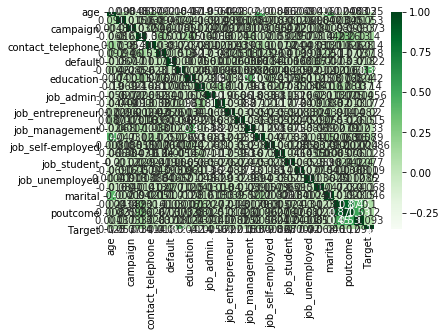

In [26]:
sns.heatmap(data.corr(), annot=True, cmap="Greens")

In [27]:
data.drop(columns="duration", inplace=True)

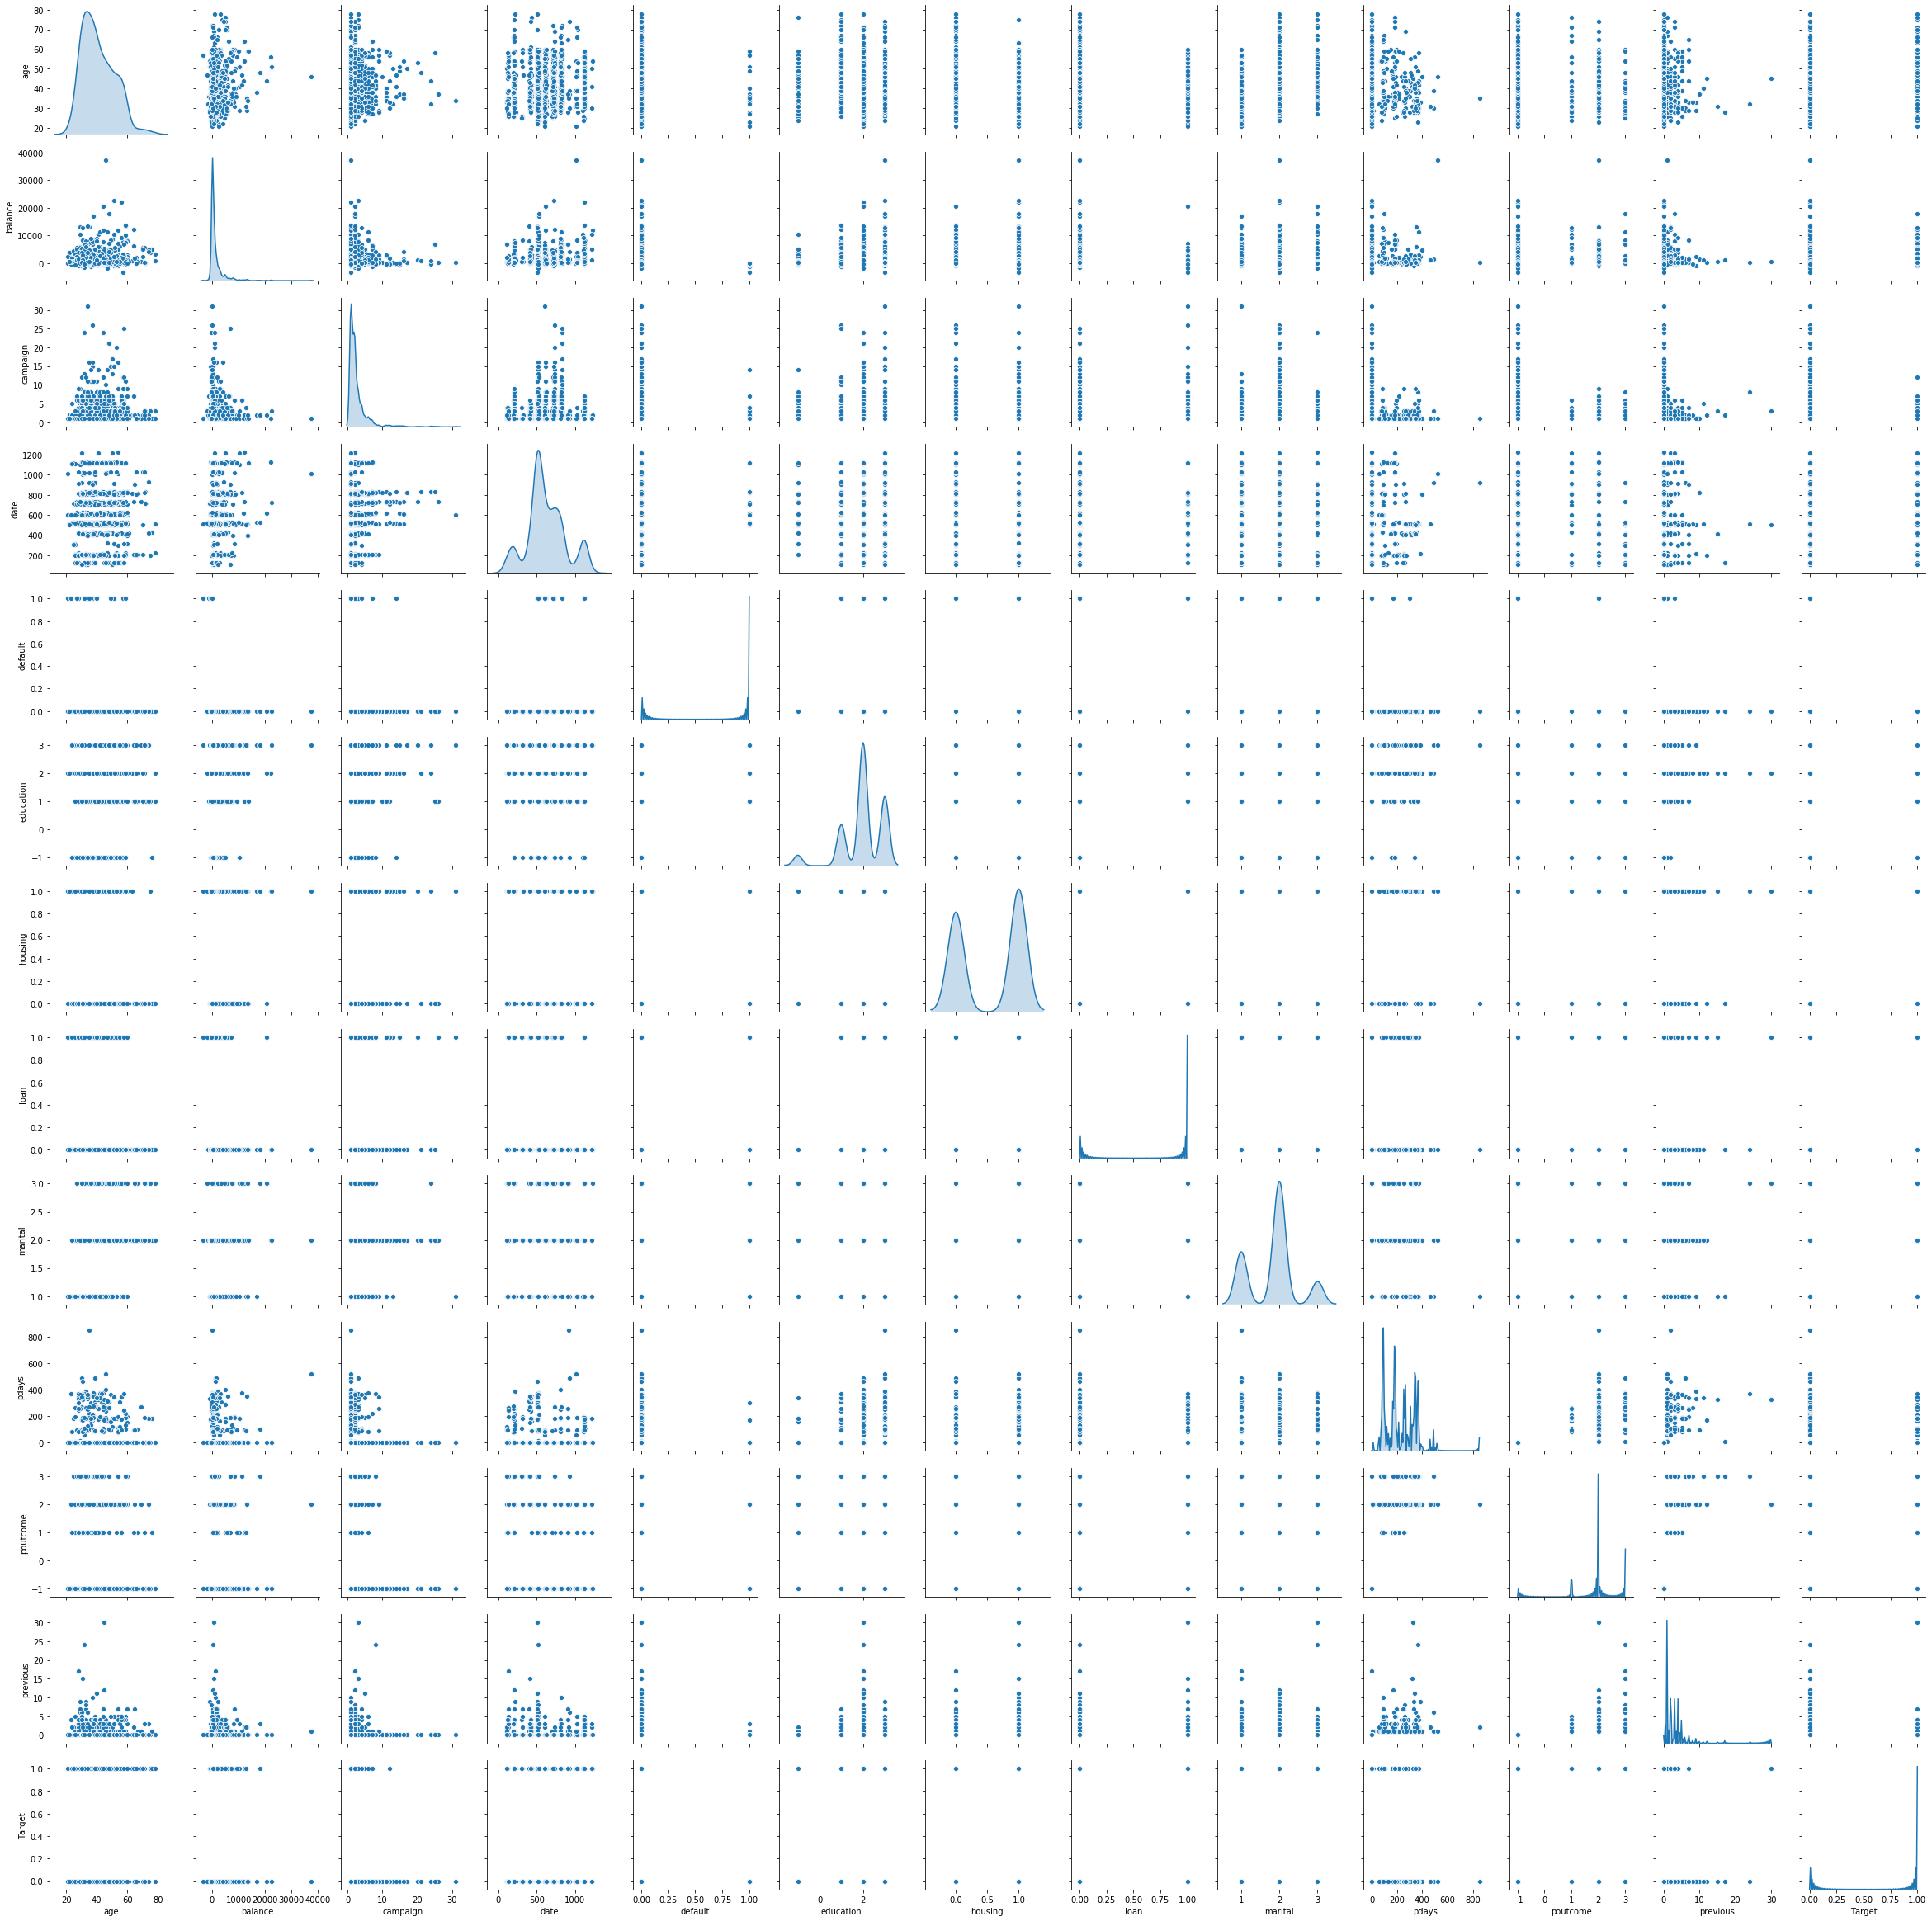

In [29]:
plot_sample = data[["age", "balance", "campaign", "date", "default", "education", "housing", "loan", "marital", "pdays", "poutcome", "previous", "Target"]].sample(1000, random_state=1)
sns.pairplot(plot_sample, diag_kind='kde')

In [30]:
X = data.drop("Target" , axis=1)
y = data["Target"]

In [31]:
X.apply(zscore)

,age,balance,campaign,contact_cellular,contact_telephone,date,default,education,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan,marital,pdays,poutcome,previous
0,1.606965,0.256419,-0.569351,-1.356030,-0.262091,-0.518099,-0.13549,1.086148,0.893915,-0.359369,-0.523740,-0.184415,-0.16793,1.944270,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,0.275762,-0.411453,-0.460355,-0.251940
1,0.288529,-0.437895,-0.569351,-1.356030,-0.262091,-0.518099,-0.13549,-0.021536,0.893915,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.436803,-1.368372,-0.411453,-0.460355,-0.251940
2,-0.747384,-0.446762,-0.569351,-1.356030,-0.262091,-0.518099,-0.13549,-0.021536,0.893915,-0.359369,-0.523740,5.422561,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,2.289359,0.275762,-0.411453,-0.460355,-0.251940
3,0.571051,0.047205,-0.569351,-1.356030,-0.262091,-0.518099,-0.13549,-3.344586,0.893915,-0.359369,1.909346,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,0.275762,-0.411453,-0.460355,-0.251940
4,-0.747384,-0.447091,-0.569351,-1.356030,-0.262091,-0.518099,-0.13549,-3.344586,-1.118674,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,-1.368372,-0.411453,-0.460355,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.076230,0.737447,-0.262091,2.013009,-0.13549,1.086148,-1.118674,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.436803,0.275762,-0.411453,-0.460355,-0.251940
45207,2.831227,0.120447,-0.246560,0.737447,-0.262091,2.013009,-0.13549,-1.129219,-1.118674,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,4.355402,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,1.919895,-0.411453,-0.460355,-0.251940
45208,2.925401,1.429593,0.721811,0.737447,-0.262091,2.013009,-0.13549,-0.021536,-1.118674,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,4.355402,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,0.275762,1.436189,1.199052,1.050473
45209,1.512791,-0.228024,0.399020,-1.356030,3.815470,2.013009,-0.13549,-0.021536,-1.118674,-0.359369,1.909346,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.436803,0.275762,-0.411453,-0.460355,-0.251940


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [33]:
svc = SVC(C=1000, gamma=0.01)
svc.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred_svc = svc.predict(X_test_scaled)
print("Accuracy on training set: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(svc.score(X_test, y_test)))

NameError: name 'X_test_scaled' is not defined

In [38]:
cm = metrics.confusion_matrix(y_test, y_pred_svc, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm, annot=True, fmt='')
print("recall score on test set: {:.4f}".format(metrics.recall_score(y_test, y_pred_svc)))
print("f-1 score on test set: {:.4f}".format(metrics.f1_score(y_test, y_pred_svc)))

NameError: name 'y_pred_svc' is not defined